# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

629

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Set up URL for API call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

#Create empty list for weather data info
weather_data = []

print(f"\nBeginning Data Retrieval\n\n" + "-"*25)

#Create counters 
setCounter = 1
lineCount = 1

#Loop through all cities in the list using a for loop
for i, city in enumerate(cities):
    #Group cities into sets of 50
    if (i % 50 == 0 and i >= 50):
        setCounter += 1
        lineCount = 0
    #Create URL with each city
    city_url = url + "&q=" + city
    
    #Print our info for line (URL, line count, set numbers and city)
    print("Processing Record " + str(lineCount) + " of Set " + str(setCounter) + " | " + city)
    
    #Add 1 to the line count
    lineCount += 1
    
    #Run the API request of cities using a try and except method
    try:
        weather_response = requests.get(city_url)
        weather_json = weather_response.json()

        #Get info from API call
        city_lat = weather_json["coord"]["lat"]
        city_lng = weather_json["coord"]["lon"]
        city_max_temp = weather_json["main"]["temp_max"]
        city_humidity = weather_json["main"]["humidity"]
        city_clouds = weather_json["clouds"]["all"]
        city_wind = weather_json["wind"]["speed"]
        city_country = weather_json["sys"]["country"]
        city_date = weather_json["dt"]
        
        #Add city ingo into weatherData list
        weather_data.append({"City": city,
                             "Cloudiness": city_clouds,
                             "Country": city_country,
                             "Date": city_date,
                             "Humidity": city_humidity,
                             "Lat": city_lat,
                             "Lng": city_lng,
                             "Max Temp": city_max_temp,
                             "Wind Speed": city_wind
                            })
        
        #If an error happens, skip the city
    except:
        print("City not found. Skipping...")
        pass
  
 
#Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval

-------------------------
Processing Record 1 of Set 1 | tuktoyaktuk
Processing Record 2 of Set 1 | saint anthony
Processing Record 3 of Set 1 | verkhoyansk
Processing Record 4 of Set 1 | dzaoudzi
Processing Record 5 of Set 1 | partenit
Processing Record 6 of Set 1 | adeje
Processing Record 7 of Set 1 | chokurdakh
Processing Record 8 of Set 1 | nakamura
Processing Record 9 of Set 1 | vaini
Processing Record 10 of Set 1 | atuona
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | apac
Processing Record 13 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 14 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 15 of Set 1 | katherine
Processing Record 16 of Set 1 | zeya
Processing Record 17 of Set 1 | cedar city
Processing Record 18 of Set 1 | qaanaaq
Processing Record 19 of Set 1 | tiksi
Processing Record 20 of Set 1 | colares
Processing Record 21 of Set 1 | castro
Processing Record 22 of Set 1 | punta arenas

Processing Record 36 of Set 4 | marawi
Processing Record 37 of Set 4 | bethel
Processing Record 38 of Set 4 | lyngseidet
Processing Record 39 of Set 4 | simpang
Processing Record 40 of Set 4 | icod de los vinos
Processing Record 41 of Set 4 | oyama
Processing Record 42 of Set 4 | black river
Processing Record 43 of Set 4 | isangel
Processing Record 44 of Set 4 | poum
Processing Record 45 of Set 4 | solnechnyy
Processing Record 46 of Set 4 | norman wells
Processing Record 47 of Set 4 | ust-ilimsk
Processing Record 48 of Set 4 | east london
Processing Record 49 of Set 4 | airai
Processing Record 0 of Set 5 | liliani
Processing Record 1 of Set 5 | amga
Processing Record 2 of Set 5 | liwale
Processing Record 3 of Set 5 | thompson
Processing Record 4 of Set 5 | provideniya
Processing Record 5 of Set 5 | pisco
Processing Record 6 of Set 5 | faanui
Processing Record 7 of Set 5 | auki
Processing Record 8 of Set 5 | illoqqortoormiut
City not found. Skipping...
Processing Record 9 of Set 5 | lor

Processing Record 24 of Set 8 | kahului
Processing Record 25 of Set 8 | lebu
Processing Record 26 of Set 8 | makokou
Processing Record 27 of Set 8 | lagdo
Processing Record 28 of Set 8 | aleksandrov gay
Processing Record 29 of Set 8 | salto
Processing Record 30 of Set 8 | victoria
Processing Record 31 of Set 8 | shache
Processing Record 32 of Set 8 | kendari
Processing Record 33 of Set 8 | swan river
Processing Record 34 of Set 8 | bonavista
Processing Record 35 of Set 8 | salalah
Processing Record 36 of Set 8 | ostrovnoy
Processing Record 37 of Set 8 | kruisfontein
Processing Record 38 of Set 8 | kavieng
Processing Record 39 of Set 8 | maine-soroa
Processing Record 40 of Set 8 | misratah
Processing Record 41 of Set 8 | uvat
Processing Record 42 of Set 8 | montes claros
Processing Record 43 of Set 8 | taltal
Processing Record 44 of Set 8 | paucartambo
City not found. Skipping...
Processing Record 45 of Set 8 | lata
Processing Record 46 of Set 8 | la libertad
Processing Record 47 of Set

Processing Record 16 of Set 12 | locri
Processing Record 17 of Set 12 | udachnyy
Processing Record 18 of Set 12 | jinchengjiang
City not found. Skipping...
Processing Record 19 of Set 12 | rawson
Processing Record 20 of Set 12 | comodoro rivadavia
Processing Record 21 of Set 12 | sokur
Processing Record 22 of Set 12 | necochea
Processing Record 23 of Set 12 | elbistan
Processing Record 24 of Set 12 | umm lajj
Processing Record 25 of Set 12 | hibbing
Processing Record 26 of Set 12 | palmer
Processing Record 27 of Set 12 | pavlodar
Processing Record 28 of Set 12 | college
Processing Record 29 of Set 12 | grindavik
Processing Record 30 of Set 12 | kalanchak
Processing Record 31 of Set 12 | san policarpo
Processing Record 32 of Set 12 | vostok
Processing Record 33 of Set 12 | scarborough
Processing Record 34 of Set 12 | nadterechnoye
Processing Record 35 of Set 12 | richards bay
Processing Record 36 of Set 12 | toora-khem
Processing Record 37 of Set 12 | half moon bay
Processing Record 38 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#Convert weather_data into Pandas DataFrame
weather_data_pd = pd.DataFrame(weather_data)

#Extract the necessary fields for the data frame
lats = weather_data_pd["Lat"]
max_temps = weather_data_pd["Max Temp"]
humidity = weather_data_pd["Humidity"]
cloudiness = weather_data_pd["Cloudiness"]
wind_speed = weather_data_pd["Wind Speed"]

# Export the City_Data into a csv
weather_data_pd.to_csv(output_data_file, index_label="City_ID")

# Show Record Count
weather_data_pd.count()

City          573
Cloudiness    573
Country       573
Date          573
Humidity      573
Lat           573
Lng           573
Max Temp      573
Wind Speed    573
dtype: int64

In [5]:
weather_data_pd

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,tuktoyaktuk,90,CA,1581030057,75,69.45,-133.04,-16.60,8.05
1,saint anthony,1,US,1581030164,46,45.02,-93.22,30.20,5.82
2,verkhoyansk,10,RU,1581030212,97,67.54,133.38,-41.37,1.86
3,dzaoudzi,1,YT,1581030212,83,-12.79,45.27,78.80,2.24
4,partenit,96,UA,1581030212,70,44.58,34.34,41.23,16.08
...,...,...,...,...,...,...,...,...,...
568,ratnagiri,57,IN,1581030266,89,16.98,73.30,57.85,1.86
569,sur,0,OM,1581030096,64,22.57,59.53,62.08,1.21
570,metro,97,ID,1581030266,89,-5.11,105.31,76.80,8.57
571,sao filipe,17,CV,1581030070,61,14.90,-24.50,71.44,15.21


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

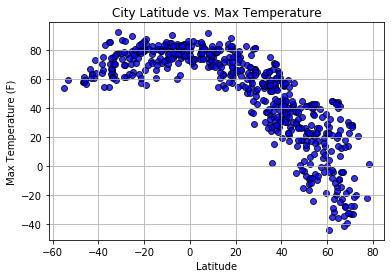

In [6]:
#Create scatterplot for latitude vs. temperature
plt.scatter(lats, 
            max_temps,
            color = "blue", linewidths=1, marker="o", 
            edgecolors= "black", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid()


# Save the figure
plt.savefig("Figures/lat_temp.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

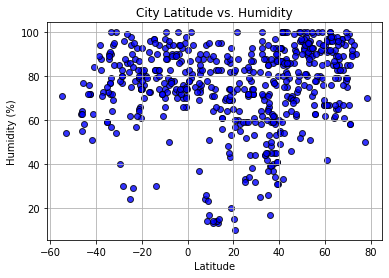

In [7]:
#Create scatterplot for latitude vs. humidity
plt.scatter(lats, 
            humidity,
            color = "blue", linewidths=1, marker="o", 
            edgecolors= "black", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid()


# Save the figure
plt.savefig("Figures/lat_humidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

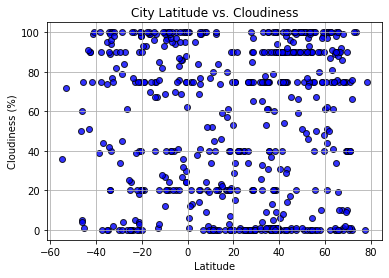

In [8]:
#Create scatterplot for latitude vs. cloudiness
plt.scatter(lats, 
            cloudiness,
            color = "blue", linewidths=1, marker="o", 
            edgecolors= "black", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid()


# Save the figure
plt.savefig("Figures/lat_cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

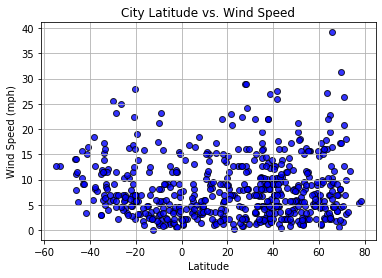

In [9]:
#Create scatterplot for latitude vs. wind speed
plt.scatter(lats, 
            wind_speed,
            color = "blue", linewidths=1, marker="o", 
            edgecolors= "black", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid()


# Save the figure
plt.savefig("Figures/lat_windspeed.png")

# Show plot
plt.show()